In [1]:
#import require packages
import requests # to access the web page
from bs4 import BeautifulSoup # to parse html and navigate html tree
import pandas as pd

In [2]:
# get the yields from the web page from treasury.gov
url = 'https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield'
page = requests.get(url)

In [3]:
# create a parse tree using Beautiful Soup
soup = BeautifulSoup(page.content)

# locate the table element in the page corresponding to the Treasury yields
t_chart = soup.find(class_="t-chart")

In [12]:
# scrape column names, use them as the key of dictionary
tableRows = t_chart.find_all('tr') # within the found node, find all the <tr> (rows)

# get th - table head 
head = tableRows[0].find_all('th')
col_names = [col_name.text for col_name in head]
print(col_names)

['Date', '1 mo', '2 mo', '3 mo', '6 mo', '1 yr', '2 yr', '3 yr', '5 yr', '7 yr', '10 yr', '20 yr', '30 yr']


In [26]:
# initialize dict to store data
cols = {col_names[i]:[] for i in range(13)}

for row in tableRows:
    cells = row.findAll('td') # within the row, find each <td> (cell)
    if (len(cells) > 0):
        for i in range(13):
            cell_value = cells[i].text.strip()
            # append value to each column
            cols[col_names[i]].append(cell_value)

In [39]:
cols

{'Date': ['05/03/21', '05/04/21', '05/05/21', '05/06/21'],
 '1 mo': ['0.02', '0.01', '0.01', '0.01'],
 '2 mo': ['0.02', '0.01', '0.01', '0.02'],
 '3 mo': ['0.04', '0.02', '0.02', '0.02'],
 '6 mo': ['0.04', '0.04', '0.04', '0.04'],
 '1 yr': ['0.06', '0.06', '0.06', '0.05'],
 '2 yr': ['0.16', '0.16', '0.16', '0.16'],
 '3 yr': ['0.33', '0.33', '0.32', '0.32'],
 '5 yr': ['0.84', '0.82', '0.80', '0.81'],
 '7 yr': ['1.29', '1.28', '1.25', '1.25'],
 '10 yr': ['1.63', '1.61', '1.59', '1.58'],
 '20 yr': ['2.18', '2.16', '2.14', '2.14'],
 '30 yr': ['2.30', '2.27', '2.25', '2.24']}

In [40]:
# convert dict to df, reset index with date

df = pd.DataFrame(data = cols)
df.set_index('Date', inplace=True)
df = df.astype(float)   # convert bs4 scraped str to float

In [47]:
df

,1 mo,2 mo,3 mo,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr,30 yr
Date,,,,,,,,,,,,
05/03/21,0.02,0.02,0.04,0.04,0.06,0.16,0.33,0.84,1.29,1.63,2.18,2.30
05/04/21,0.01,0.01,0.02,0.04,0.06,0.16,0.33,0.82,1.28,1.61,2.16,2.27
05/05/21,0.01,0.01,0.02,0.04,0.06,0.16,0.32,0.80,1.25,1.59,2.14,2.25
05/06/21,0.01,0.02,0.02,0.04,0.05,0.16,0.32,0.81,1.25,1.58,2.14,2.24


In [48]:
# display the first row of yields
row = df.iloc[-1]
print(row)

1 mo     0.01
2 mo     0.02
3 mo     0.02
6 mo     0.04
1 yr     0.05
2 yr     0.16
3 yr     0.32
5 yr     0.81
7 yr     1.25
10 yr    1.58
20 yr    2.14
30 yr    2.24
Name: 05/06/21, dtype: float64


In [8]:
# utility function to convert term label to time in years
def labelToYears(label):
    tokens = label.split()
    if len(tokens) != 2:
        raise Exception("Expecting <term> mo|yr")
    term = float(tokens[0])
    period = tokens[1]
    if period not in ['mo', 'yr']:
        raise Exception("Expecting period of 'mo' or 'yr'")
    result = term if period == 'yr' else term / 12.0
    return result

In [52]:
# test the utility function
print(labelToYears("1 mo"))
print(labelToYears("5 yr"))

0.08333333333333333
5.0


In [61]:
col_names[1:]

['1 mo',
 '2 mo',
 '3 mo',
 '6 mo',
 '1 yr',
 '2 yr',
 '3 yr',
 '5 yr',
 '7 yr',
 '10 yr',
 '20 yr',
 '30 yr']

In [10]:
# create a time-in-years list, based on the table headers
years = []
for colname in col_names[1:]:
    years.append(labelToYears(colname))
print(years)

[0.08333333333333333, 0.16666666666666666, 0.25, 0.5, 1.0, 2.0, 3.0, 5.0, 7.0, 10.0, 20.0, 30.0]


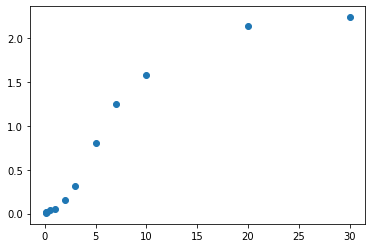

In [11]:
# plot the yield curve
%matplotlib inline
import matplotlib.pyplot as plt

# hard-code numeric time values in years, for yield curve
#years = [1/12, 2/12, 3/12, 6/12, 1, 2, 3, 5, 7, 10, 20, 30]
yields = row.tolist()
plt.scatter(years, yields)